This is a noisy trajectory, without weigths

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;</style>"))
import os 
os.chdir("..")
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
from numerics.integration.matrices import *
from numerics.utilities.misc import *
import matplotlib.pyplot as plt


In [19]:
from numerics.machine_learning.misc import *

In [13]:
params, exp_path = def_params()
xi, kappa, omega, eta = params

T = 100.
dt = 1e-3

itraj=1
train_id = 0
total_time,dt = T*kappa, kappa*dt


states_si, dys_si = load(itraj=1, exp_path=exp_path, total_time=total_time, dt=dt, ext_signal=1)
save_dir = get_training_save_dir(exp_path, total_time, dt, itraj,train_id)


In [16]:
loss = np.load(save_dir+"loss.npy")
grads = np.load(save_dir+"grads.npy")
params = np.load(save_dir+"params.npy")

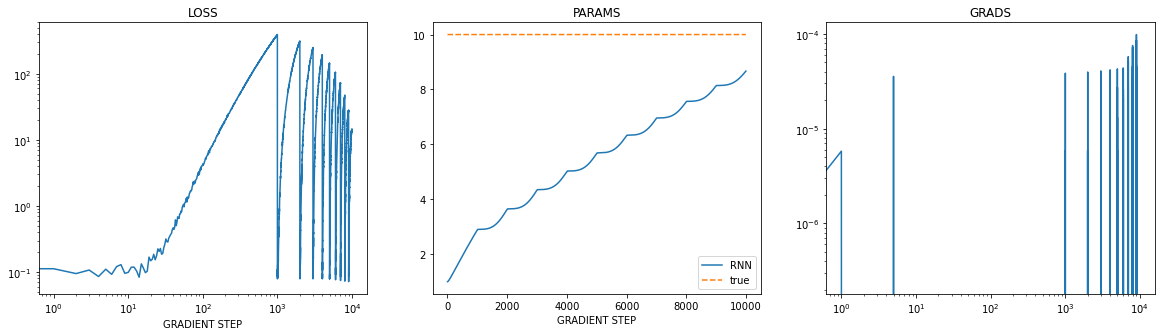

In [20]:
plot_history(data=[loss,params,grads])

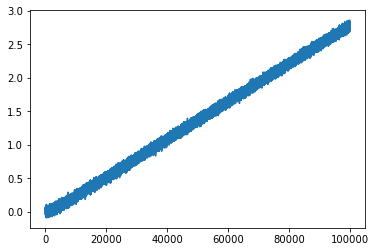

In [3]:
plt.plot(dys_si[:,0])

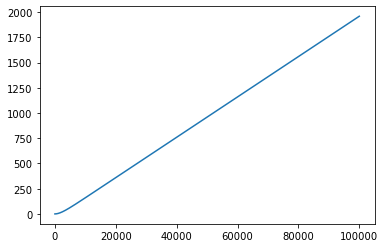

In [4]:
plt.plot(states_si[:,0])


In [ ]:
params, exp_path = def_params()



initial_parameters = np.array([10., 4*2*np.pi/total_time]).astype(np.float32)
true_parameters = np.array([10., 4*2*np.pi/total_time]).astype(np.float32)

In [16]:
[xi, kappa, omega, eta] = 0, 1, 0, 10
params = [xi, kappa, omega, eta]

A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

In [17]:
B

array([[-3.16227766, -0.        ],
       [-0.        , -0.        ]])

In [5]:
params, exp_path = def_params()

initial_parameters = np.array([10., 4*2*np.pi/total_time]).astype(np.float32)
true_parameters = np.array([10., 4*2*np.pi/total_time]).astype(np.float32)


A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

BS = 1#len(tfsignals[0])
batch_shape = [BS, None, 3]
model = Model(params=params, dt=dt, initial_parameters=initial_parameters,
              true_parameters=true_parameters, initial_states = np.zeros((1,5)).astype(np.float32),
              cov_in=covss, batch_size=tuple([None,None,3]))#tuple(batch_shape))
model.recurrent_layer.build(tf.TensorShape(batch_shape))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))

In [7]:
preds = model.predict(tfsignals)

2022-05-17 17:08:24.710912: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


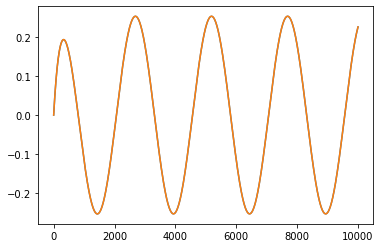

In [40]:
plt.plot(np.squeeze(tfsignals[:,:,1]))
plt.plot(preds[0,:,0])

In [62]:
np.unique(amps)

array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  10.        ,  12.91549665,  21.5443469 ,
        35.93813664,  59.94842503, 100.        ])

In [ ]:
def logito(A, N=9):
    aa = np.unique(np.sort(list(np.logspace(np.log10(A/100), np.log10(10*A), N)) + [A]))
    return aa

amps = logito(true_parameters[0])
freqs = logito(true_parameters[1])

loss ={}
true_omega = true_parameters[1]
A = true_parameters[0]
for amplitude in tqdm(amps):

    for omega in freqs:
        model.trainable_variables[0].assign(tf.convert_to_tensor(np.array([[ amplitude, omega ]]).astype(np.float32)))
        preds = model.predict(tfsignals)
        loss[str([amplitude, omega])] = tf.keras.losses.mse(np.squeeze(tfsignals[:,:,1]), preds[0,:,0])

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 7/10 [02:02<00:52, 17.62s/it]

In [85]:
X,Y = np.meshgrid(amps, freqs)

In [94]:
valls = np.squeeze(list(loss.values()))

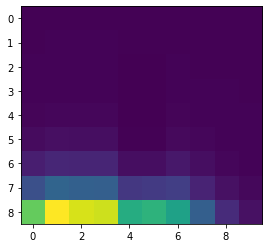

In [96]:
plt.imshow(np.reshape(valls, (9,10)))


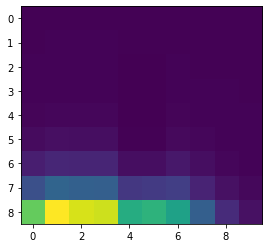

In [80]:
plt.imshow(np.reshape(np.squeeze(list(loss.values())), (9,10)))

TypeError: 'norm' must be an instance of matplotlib.colors.Normalize or None, not a numpy.ndarray

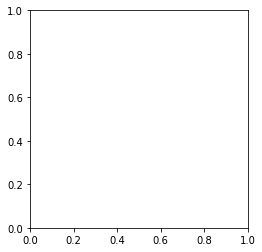

In [79]:
plt.imshow(amps, freqs, np.reshape(np.squeeze(list(loss.values())), (9,10)))

In [73]:
plt.imshow(qa

array([3.0754559e-02, 3.0852439e-02, 3.1133285e-02, 3.1360347e-02,
       2.4591617e-02, 2.4535026e-02, 3.0517811e-02, 3.0469306e-02,
       3.0498883e-02, 3.0442541e-02, 3.1286538e-02, 3.1759184e-02,
       3.2221068e-02, 3.2612164e-02, 2.0497290e-02, 2.0412367e-02,
       3.0927381e-02, 3.0689288e-02, 3.0638654e-02, 3.0496344e-02,
       3.3314705e-02, 3.4571849e-02, 3.5274513e-02, 3.5929881e-02,
       1.4139017e-02, 1.4037686e-02, 3.2344032e-02, 3.1440496e-02,
       3.1023990e-02, 3.0637756e-02, 3.9815865e-02, 4.3368995e-02,
       4.4243146e-02, 4.5281779e-02, 5.7497001e-03, 5.7266196e-03,
       3.7039902e-02, 3.3914827e-02, 3.2141808e-02, 3.1033838e-02,
       6.0530018e-02, 7.1015015e-02, 7.1382485e-02, 7.2828397e-02,
       5.7015288e-05, 5.1280949e-04, 5.2273706e-02, 4.1915044e-02,
       3.5497539e-02, 3.2195512e-02, 1.2631074e-01, 1.5813179e-01,
       1.5503149e-01, 1.5633462e-01, 1.9108560e-02, 2.1490229e-02,
       1.0113039e-01, 6.7526400e-02, 4.5790751e-02, 3.5707477e

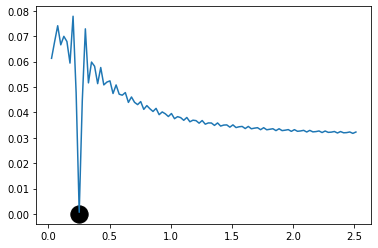

In [55]:
ax=plt.subplot(111)
ax.plot(np.squeeze(list(loss.keys())), np.squeeze(list(loss.values())))
ax.scatter( [true_parameters[1]],[0], color="black",s=300)

In [6]:
spp = tf.split(tfsignals, 50, axis=1)

In [7]:
n_epochs = 10

In [8]:
cc = []
for epoch in range(n_epochs):
    model.reset_states()  
    for k in spp:
        bb = model.train_step((k,k))
        cc+=[bb]
    loss =  np.squeeze(bb["LOSS"].numpy())
    print("\r EPOCH {}/{}   loss:{}    params{}    grads{}".format(epoch, n_epochs,loss, np.squeeze(bb["PARAMS"].numpy()), np.squeeze(bb["GRADS"].numpy())),end="")
    if loss<1e-10:
        break

2022-05-17 16:10:43.783747: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 EPOCH 9/10   loss:0.06193508207798004    params[ 9.124218   -0.25412917]    grads[-0.01976766  5.8980484 ]]1]

In [15]:
def plot_history(cc, preds=None):
    plt.figure(figsize=(20,5))
    if preds is None:

        ax1 = plt.subplot(131)
        ax2 = plt.subplot(132)
        ax3 = plt.subplot(133)       
    else:
        ax1 = plt.subplot(141)
        ax2 = plt.subplot(142)
        ax3 = plt.subplot(143)       
        ax4 = plt.subplot(144)
    
    history_loss = np.squeeze([cc[k]["LOSS"] for k in range(len(cc))])
    ax1.set_title("LOSS")
    ax1.plot(history_loss)
    ax1.loglog()
    ax1.set_xlabel("GRADIENT STEP")
    
    params=np.squeeze([cc[k]["PARAMS"] for k in range(len(cc))])
    ax2.set_title("PARAMS")
    ax2.plot(params[:,0],label="RNN")
    ax2.plot(np.ones(len(params))*true_parameters[0], '--',label="true")
    ax2.set_xlabel("GRADIENT STEP")
    ax2.legend()
    
    grads = np.squeeze([cc[k]["LOSS"] for k in range(len(cc))])
    ax3.set_title("GRADS")
    ax3.plot(grads)
    ax3.loglog()
    
    
    if preds is not None:
        ax4.set_title("PREDICTIONS")
        ax4.plot(np.squeeze(preds)[:,0], '--',color="red", alpha=0.5,label="RNN")
        ax4.plot(dd[0], color="blue", label="true", alpha=0.5)
        ax4.legend()

In [19]:
freq = 4*2*np.pi/10

In [20]:

model.trainable_variables[0].assign(tf.convert_to_tensor(np.array([[10. , freq]]).astype(np.float32)))

<tf.Variable 'UnreadVariable' shape=(1, 2) dtype=float32, numpy=array([[10.       ,  2.5132742]], dtype=float32)>

In [21]:
preds = model.predict(tfsignals)

In [16]:
model.reset_states()
preds = model.predict(tfsignals)

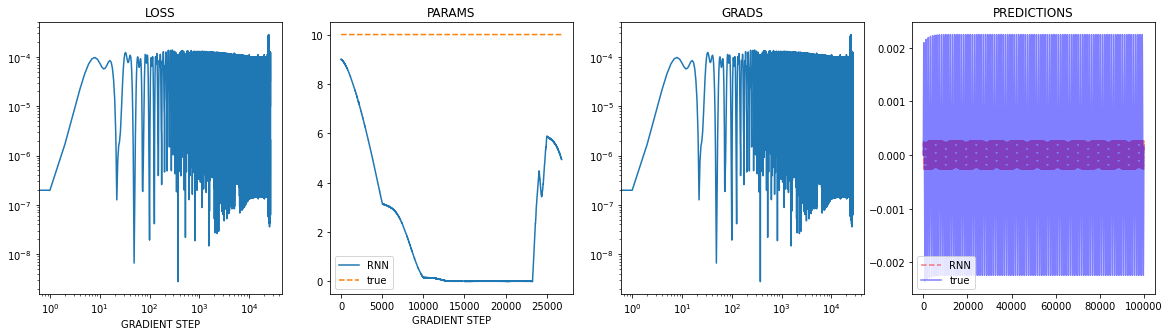

In [17]:
plot_history(cc, preds)

In [12]:
loss = [cc[k]["LOSS"].numpy() for k in range(len(cc))]
grads = np.squeeze([cc[k]["GRADS"].numpy() for k in range(len(cc))])
params = np.squeeze([cc[k]["PARAMS"].numpy() for k in range(len(cc))])